# Week 2: Preprocessing Text (Part 2)


In [1]:
#necessary library imports and setup introduced previously

import sys
import re
import pandas as pd
#import matplotlib.pyplot as plt
#%matplotlib inline
from itertools import zip_longest
import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [ ]:
##uncomment these lines below if working on colab
#from google.colab import drive
##mount google drive
#drive.mount('/content/drive/')


## Overview
Remember, a raw text document is just a sequence of characters. There are a number of basic steps that are often performed when processing natural language text. In lab sessions this week we are covering some of the basic text pre-processing methods. In the previous notebook, you looked at
- <b> segmentation</b> - breaking down large units of text into smaller units such as documents and sentences.
- <b> tokenisation</b> - roughly speaking, this involves grouping characters into words;

In this notebook, you will be looking at:
- <b>case normalisation</b> - this involves converting all of the text into lower case;
- <b>stemming</b> - this involves removing a word's inflections to find the stem; and
- <b>punctuation and stop-word removal</b> - stop-words are common functions words that in some situations can be ignored.

Note that we do not always apply all of the above preprocessing methods; it depends on the application. One of the things that you will be learning about in this module, is when the application of each of these methods is, and is not, appropriate.

## Normalising text and removing unimportant tokens
In this next section we will consider several methods that pre-process (tokenised) text in ways that are sometimes helpful to 'downstream' processing.

### Number and case normalisation
Without any kind of normalisation, the tokens `"help"` and `"Help"` are two distinct types. In some contexts you may not want to distinguish them.

Another example, is that `"1998"` and `"1999"` count as distinct types. There are situations where there is no need to distinction between different numbers.

The following code performs case normalisation and replaces tokens that consist of digits by "NUM".
- Python provides a [number of functions](http://docs.python.org/library/stdtypes.html#string-methods), which you can call in order to analyse their content, or produce new strings from them.
- The code uses a [list comprehension](http://docs.python.org/tutorial/datastructures.html#list-comprehensions) to build a new list by looping through and filtering items.

In [2]:
tokens = ["The","cake","is","a","LIE"]      #a list of tokens, some of which contain uppercase letters
print([token.lower() for token in tokens])   #print newly created list of all lowercase tokens

numbers = ['in', 'the', 'year', '120', 'of', 'the', 'fourth', 'age', ',', 'after', '120', 'years', 'as', 'king', ',' , 'aragorn', 'died', 'at', 'the', 'age', 'of', '210']
print(["NUM" if token.isdigit() else token for token in numbers])  #replace all number tokens with "NUM" in a new list of tokens

['the', 'cake', 'is', 'a', 'lie']
['in', 'the', 'year', 'NUM', 'of', 'the', 'fourth', 'age', ',', 'after', 'NUM', 'years', 'as', 'king', ',', 'aragorn', 'died', 'at', 'the', 'age', 'of', 'NUM']


### Exercise 1.1
- Write a function <code>number_normalise</code> which
    * replaces numbers with NUM;
    * and replaces tokens such as `"4th"`, `"1st"` and `"22nd"` with `"Nth"`.
- Test your code on the list `["Within","5","minutes",",","the", "1st", "and", "2nd", "placed", "runners", "lapped", "the", "5th","."]`.
- Check that the token `"and"` isn't changed to `"Nth"`.
- You will find [this page](http://docs.python.org/library/stdtypes.html#string-methods) useful.


In [12]:
import re

test_data = ["Within","5","minutes",",","the", "1st", "and", "2nd", "placed", "runners", "lapped", "the", "5th","."]
print(test_data)

pattern = re.compile(r'\d+(th|st|nd|rd)$')

_td = ["NUM" if token.isdigit() else token for token in test_data]
__td = ["Nth" if pattern.fullmatch(token) else token for token in _td]

print(__td)
    

['Within', '5', 'minutes', ',', 'the', '1st', 'and', '2nd', 'placed', 'runners', 'lapped', 'the', '5th', '.']
['Within', 'NUM', 'minutes', ',', 'the', 'Nth', 'and', 'Nth', 'placed', 'runners', 'lapped', 'the', 'Nth', '.']


In [13]:
def number_normalise(input_data):
    pattern = re.compile(r'\d+(th|st|nd|rd)$')
    _td = ["NUM" if token.isdigit() else token for token in input_data]
    __td = ["Nth" if pattern.fullmatch(token) else token for token in _td]
    return __td

In [14]:
print(number_normalise(test_data))

['Within', 'NUM', 'minutes', ',', 'the', 'Nth', 'and', 'Nth', 'placed', 'runners', 'lapped', 'the', 'Nth', '.']


### Exercise 1.2
- Complete the code in the cell below. You have just two lines to complete. The goal is to use a large sample of the Reuters corpus to establish the extent to which vocabulary size is reduced when number and case normalisation is applied.
- For each of the two incomplete lines you should ideally use nested list comprehensions. This is described in Section 5.1.4 in [this document](http://docs.python.org/tutorial/datastructures.html#list-comprehensions).  Alternatively, you could define functions which iterate over the sentences in each sample and the tokens within each sentence.


In [37]:
#the sample_sentences() function from the last lab will be useful here
#next week we will look at including useful functions like this in a utils python file which we can import from
import random

def sample_sentences(corpus,sample_size):

    size=len(corpus)
    ids=random.sample(range(size),sample_size)
    sample=[corpus[i] for i in ids]
    return sample

#in vocabulary_size(), we use a dictionary to store the frequency of each token type in the corpus
#the number of keys in this dictionary is the size of the vocab
def vocabulary_size(sentences):
    tok_counts = {}
    for sentence in sentences:
        for token in sentence:
            tok_counts[token]=tok_counts.get(token,0)+1
    return len(tok_counts.keys())



sample_size = 10000

raw_sentences = sample_sentences(reuters.sents(),sample_size)

############################################
lowered_sentences = [[token.lower() for token in sentence] for sentence in raw_sentences] # case normailsation

normalised_sentences = [["NUM" if token.isdigit() else token for token in sentence] for sentence in lowered_sentences] # number normalisation
############################################

# raw_vocab_size = vocabulary_size(tokenised_sentences)
raw_vocab_size = vocabulary_size(raw_sentences)
normalised_vocab_size = vocabulary_size(normalised_sentences)
print("Normalisation produced a {0:.2f}% reduction in vocabulary size from {1} to {2}".format(
    100*(raw_vocab_size - normalised_vocab_size)/raw_vocab_size,raw_vocab_size,normalised_vocab_size))


Normalisation produced a 28.16% reduction in vocabulary size from 19926 to 14314


In [38]:
# raw_sentences
# lowered_sentences
# normalised_sentences

## Stemming
A considerable amount of the lexical variation found in documents results from the use of morphological variants which we might not wish to distinguish - e.g. when determining the topic of a document. An easy way to remove these varied forms is to use a stemmer. NLTK includes a number of stemmers in the `nltk.stem` package.
- [NLTK stem module API](https://www.nltk.org/api/nltk.stem.html)

- [NLTK Porter stemmer](https://www.nltk.org/api/nltk.stem.porter.html)

- Look at the code below to show how the NLTK implementation of the Porter stemmer in `nltk.stem.porter.PorterStemmer` stems a sample of sentences in the Reuters corpus.
- Have a close look at the differences between the columns. This will give you a good indication of what the stemmer does.

In [39]:
from nltk.stem.porter import PorterStemmer

st = PorterStemmer()

sample_size = 10

tokenised_sentences = sample_sentences(reuters.sents(),sample_size)

for sentence in tokenised_sentences:
    df = pd.DataFrame(list(zip_longest(sentence,[st.stem(token) for token in sentence])),columns=["BEFORE","AFTER"])
    display(df)

,BEFORE,AFTER
0,MITI,miti
1,is,is
2,expected,expect
3,to,to
4,lower,lower
5,the,the
6,projection,project
7,for,for
8,primary,primari
9,energy,energi


,BEFORE,AFTER
0,The,the
1,sale,sale
2,sharply,sharpli
3,undercut,undercut
4,the,the
5,U,u
6,.,.
7,S,s
8,.,.
9,offer,offer


,BEFORE,AFTER
0,Rebates,rebat
1,requested,request
2,ranged,rang
3,from,from
4,127,127
5,.,.
6,75,75
7,to,to
8,132,132
9,.,.


,BEFORE,AFTER
0,CONTINENTAL,continent
1,INFORMATION,inform
2,SYSTEMS,system
3,&,&
4,lt,lt
...,...,...
79,continental,continent
80,information,inform
81,systems,system
82,corp,corp


,BEFORE,AFTER
0,The,the
1,violations,violat
2,were,were
3,worth,worth
4,100,100
5,mln,mln
6,dls,dl
7,to,to
8,the,the
9,Japanese,japanes


,BEFORE,AFTER
0,The,the
1,bank,bank
2,','
3,s,s
4,stake,stake
5,has,ha
6,since,sinc
7,been,been
8,cut,cut
9,to,to


,BEFORE,AFTER
0,Recent,recent
1,acquisitions,acquisit
2,in,in
3,North,north
4,America,america
5,had,had
6,strengthened,strengthen
7,Lucas,luca
8,Aerospace,aerospac
9,and,and


,BEFORE,AFTER
0,The,the
1,plan,plan
2,",",","
3,involving,involv
4,concessional,concession
5,rescheduling,reschedul
6,of,of
7,sovereign,sovereign
8,debt,debt
9,in,in


,BEFORE,AFTER
0,"""",""""
1,The,the
2,buffer,buffer
3,stock,stock
4,may,may
5,not,not
6,help,help
7,the,the
8,terminal,termin
9,market,market


,BEFORE,AFTER
0,HARCOURT,harcourt
1,BRACE,brace
2,JOVANOVICH,jovanovich
3,INC,inc
4,&,&
...,...,...
102,and,and
103,W,w
104,.,.
105,B,b


### Exercise 2.1
- By looking at the impact on a large sample of the Reuters corpus, establish the extent to which vocabulary size is reduced by stemming.
- Write code to do this in the empty cell below. You should be able to re-use a lot of the code from the code you used when measuring the impact of lower case and number normalisation.

In [45]:
sample_size = 10000

raw_sentences = sample_sentences(reuters.sents(),sample_size)

st_sentences = [[st.stem(token.lower()) for token in sentence] for sentence in raw_sentences] # case normailsation

# raw_vocab_size = vocabulary_size(tokenised_sentences)
raw_vocab_size = vocabulary_size(raw_sentences)
st_vocab_size = vocabulary_size(st_sentences)
print("Stem produced a {0:.2f}% reduction in vocabulary size from {1} to {2}".format(
    100*(raw_vocab_size - st_vocab_size)/raw_vocab_size,raw_vocab_size,st_vocab_size))

Stem produced a 41.19% reduction in vocabulary size from 20169 to 11862


### Exercise 2.2
* Try using the WordNetLemmatizer <code>nltk.stem.wordnet.WordNetLemmatizer</code> instead of the Porter Stemmer.
* Using a large sample of the Reuters corpus, establish the extent to which the vocabulary size reduced by lemmatization?
* As an extension, you could look at different sample sizes and/or different corpora and display the results in a table or graph (e.g., using <code>pandas</code> and/or <code>matplotlib</code>)

In [43]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lukebirkett/nltk_data...


True

In [44]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

sample_size = 10000

raw_sentences = sample_sentences(reuters.sents(),sample_size)

st_sentences = [[lemmatizer.lemmatize(token.lower()) for token in sentence] for sentence in raw_sentences] # case normailsation

# raw_vocab_size = vocabulary_size(tokenised_sentences)
raw_vocab_size = vocabulary_size(raw_sentences)
st_vocab_size = vocabulary_size(st_sentences)
print("Lem produced a {0:.2f}% reduction in vocabulary size from {1} to {2}".format(
    100*(raw_vocab_size - st_vocab_size)/raw_vocab_size,raw_vocab_size,st_vocab_size))

Stem produced a 5.39% reduction in vocabulary size from 20212 to 19122


### Punctuation and stop-word removal
A stopword is a word that occurs so often that it loses its usefulness in some tasks. We may get more meaningful information from our corpus analysis if we remove stopwords and punctuation.

The code below takes a list of tokens and creates a new list, which contains only those strings which are alphabetic and non-stop-words.

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukebirkett/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:

stop = stopwords.words('english')
tokens="The cat , which is really fat , sat on the mat".lower().split()
filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop]
print(tokens)
print(filtered_tokens)

['the', 'cat', ',', 'which', 'is', 'really', 'fat', ',', 'sat', 'on', 'the', 'mat']
['cat', 'really', 'fat', 'sat', 'mat']


**Note**: `isalpha` only returns `True` if the string is entirely composed of alphabet characters. If you want a function to return `True` even when a word contains digits, then you should use `isalnum`.`

### Exercise 3.1
- In the empty cell below, write code that looks at a large sample of the Reuters corpus, establishing what proportion of tokens are stop-words.
- As extension, you could establish the mean (and or the distribution of the) number of stop-words per sentence; or compare the numbers of stop-words in different corpora.

In [97]:
increment = (50001 - 1) / 10

sample_size = [i for i in range(0, 50000, int(increment))]

proportion = []

random.seed(33)

for i in sample_size[1:]:
    raw_sentences = sample_sentences(reuters.sents(),i)
    lowered_sentences = [[token.lower() for token in sentence] for sentence in raw_sentences]
    sentences = [["NUM" if token.isdigit() else token for token in sentence] for sentence in lowered_sentences]
    
    stop = stopwords.words('english')
    
    # non_stop = [["STOP" if token in stop else token for token in sentence] for sentence in sents]
    _sentences = ["STOP" if token in stop else token for sentence in sentences for token in sentence]
    
    total = len(_sentences)
    stop_entries = len([token for token in _sentences if token == "STOP"])
    non_stop_entries = total - stop_entries
    
    _total = len(_sentences)/total
    _stop_entries = stop_entries/total
    _non_stop_entries = non_stop_entries/total

    proportion.append(_stop_entries)
    
    print(i, _total, _stop_entries, _non_stop_entries)

5000 1.0 0.26754483840322363 0.7324551615967764
10000 1.0 0.265817053690141 0.734182946309859
15000 1.0 0.26658602281979926 0.7334139771802007
20000 1.0 0.2638287258628746 0.7361712741371254
25000 1.0 0.2642168982862989 0.7357831017137011
30000 1.0 0.26464242984785874 0.7353575701521413
35000 1.0 0.26426037353641263 0.7357396264635874
40000 1.0 0.265060480693773 0.734939519306227
45000 1.0 0.2646013280107282 0.7353986719892718


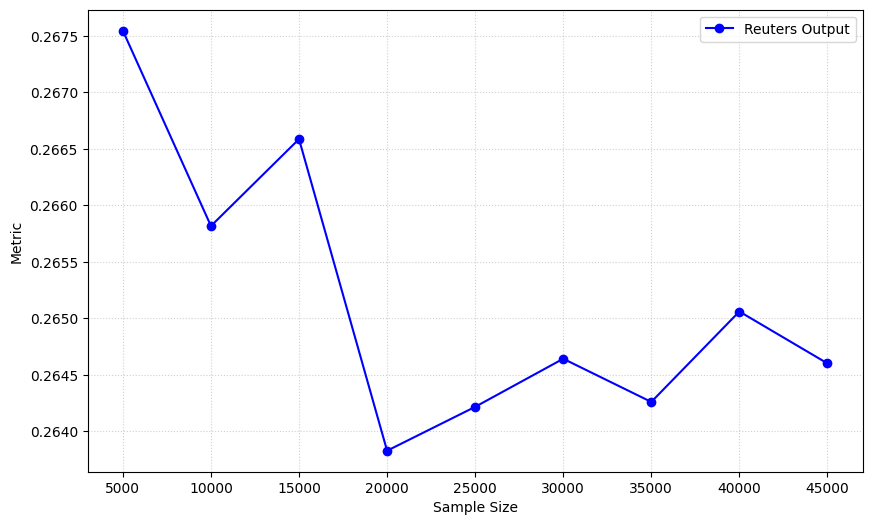

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(sample_size[1:], proportion, marker='o', linestyle='-', color='blue', label='Reuters Output')

plt.title('')
plt.xlabel('Sample Size')
plt.ylabel('Metric')

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

### Exercise 3.2
Explain the difference between the number of tokens in a corpus and the size of the vocabulary of a corpus.  Would you expect stopword removal to have a greater effect on the size of the vocabulary or the number of tokens in the corpus?

I would expect the proportion of stop words in a corpus to go down as the size of the corpus and number of tokens increases. This is because the composition of stop words in a sentence will be consistent regardless of the size of the corpus, however, the additional of more tokens increases the likelihood that more words will be used, in particular the inclusion of less commonly used words